## 1.0 Data Collection and Exploration

### 1.1 Import all the `library` needed 

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  

### 1.2 Load the dataset into variable `data`

In [124]:
data = pd.read_csv('assign.csv')
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
0,36,blue-collar,married,middle,no,yes,may,cell,239,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
1,39,blue-collar,married,middle,yes,no,nov,NaN,124,1,999,0,-0.1,93.200,-42.0,4.076,5195.8,False
2,31,services,single,middle,no,no,may,cell,163,1,999,0,-1.8,92.893,-46.2,1.344,5099.1,False
3,35,technician,married,professional,yes,no,jul,cell,157,8,999,0,1.4,93.918,-42.7,4.962,5228.1,False
4,38,blue-collar,married,middle,yes,no,may,phone,275,6,999,0,1.1,93.994,-36.4,4.856,5191.0,False


### 1.3 Explore the dataset

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      40000 non-null  int64  
 1   x2      40000 non-null  object 
 2   x3      40000 non-null  object 
 3   x4      40000 non-null  object 
 4   x5      40000 non-null  object 
 5   x6      40000 non-null  object 
 6   x7      40000 non-null  object 
 7   x8      39994 non-null  object 
 8   x9      40000 non-null  int64  
 9   x10     40000 non-null  int64  
 10  x11     40000 non-null  int64  
 11  x12     40000 non-null  int64  
 12  x13     40000 non-null  float64
 13  x14     39992 non-null  float64
 14  x15     40000 non-null  float64
 15  x16     40000 non-null  float64
 16  x17     40000 non-null  float64
 17  y       40000 non-null  bool   
dtypes: bool(1), float64(5), int64(5), object(7)
memory usage: 5.2+ MB


In [28]:
#code to show only numerical statistic
data.describe()

,x1,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,39992.000000,40000.000000,40000.000000,40000.000000
mean,40.012200,258.721825,2.566375,962.110625,0.173075,0.081885,93.576081,-40.501567,3.621611,5167.021655
std,10.416123,260.258055,2.771441,187.806197,0.495758,1.570986,0.578954,4.627286,1.734336,72.249786
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


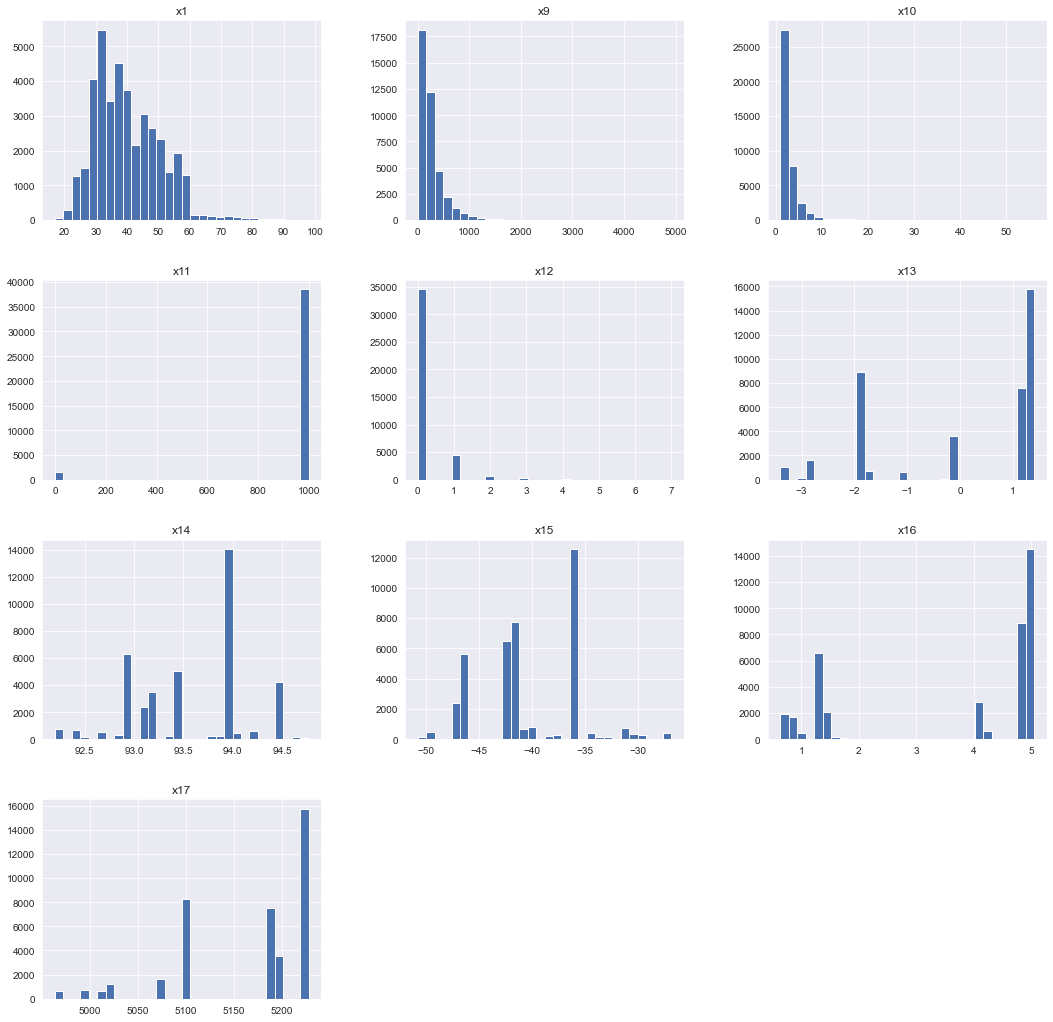

In [29]:
#find out the distribution of the dataset on each statistics.
data.hist(bins=30, figsize=(18,18))
plt.show()

#### Heatmap

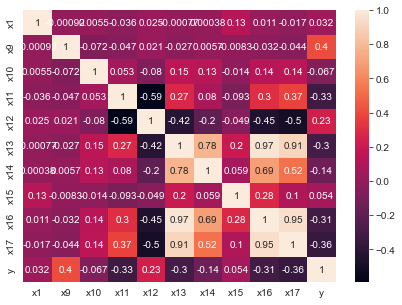

In [30]:
corrmatrix = data.corr()
heatmap = sns.heatmap(corrmatrix, annot = True)
sns.set({'figure.figsize':(18,8)})

#### Scatter matrix

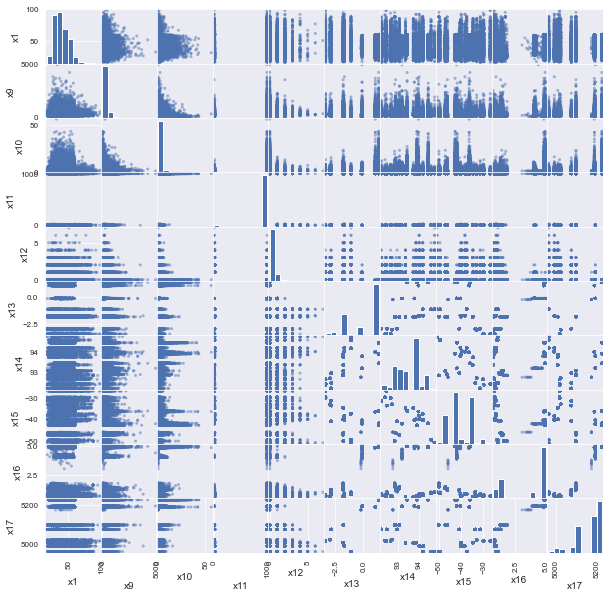

In [31]:
from pandas.plotting import scatter_matrix
num_cols=['x1','x9','x10','x11','x12','x13','x14','x15','x16','x17']

scatter_matrix(data[num_cols], figsize=(10,10))
plt.show()

## 2.0 Data Preprocessing 

### 2.1 Split the dataset into training and testing set

#### 2.1.1 Seperate the output vector from the input matrix

In [125]:
X = data.drop('y', axis=1)
y = data['y']

#show the shapes and types of X and y
print('Shape of original dataset: ', data.shape)
print('X shape: ', X.shape, 'type: ', type(X))
print('y shape: ', y.shape, 'type: ', type(y))

Shape of original dataset:  (40000, 18)
X shape:  (40000, 17) type:  <class 'pandas.core.frame.DataFrame'>
y shape:  (40000,) type:  <class 'pandas.core.series.Series'>


#### 2.1.2 Split the dataset into training and testing set

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=40)
print('Full set shape: ', X.shape)
print('Training shape: ', x_train.shape)
print('Testing shape: ', x_test.shape)

Full set shape:  (40000, 17)
Training shape:  (32000, 17)
Testing shape:  (8000, 17)


#### 2.1.3 Split the input matrix into numerical and categorical sets

In [127]:
#for training data
x_train_num = x_train.drop(['x2','x3', 'x4','x5','x6','x7','x8'], axis=1)
x_train_cat = x_train[['x2','x3', 'x4','x5','x6','x7','x8']]
print('x_train_num shape: ', x_train_num.shape)
print('x_train_cat shape: ', x_train_cat.shape)

x_train_num shape:  (32000, 10)
x_train_cat shape:  (32000, 7)


### 2.2 Handling missing values

#### 2.2.1 Handle missing values for numerical data

In [128]:
#find missing value
print('Number of missing values for all numerical columns: ', x_train_num.isnull().sum())

#fill in missing value with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(x_train_num)
x_train_num_tr = imputer.transform(x_train_num)

#check if missing values still exists for numerical data
x_train_num_tr_pd = pd.DataFrame(x_train_num_tr, columns = x_train_num.columns)
# x_train_num_tr is numpy array, dont have isnull(), so convert it to dataframe first
print('\nNumber of missing values after filled in missing value:', x_train_num_tr_pd.isnull().sum())

#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(x_train_num_tr)       
x_train_num_tr = scaler.transform(x_train_num_tr)

print('\nMean of all columns:\n', x_train_num_tr.mean(axis = 0))
print('\nStd of all columns:\n', x_train_num_tr.std(axis = 0))

Number of missing values for all numerical columns:  x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    7
x15    0
x16    0
x17    0
dtype: int64

Number of missing values after filled in missing value: x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
dtype: int64

Mean of all columns:
 [-1.13686838e-16 -8.21565038e-18 -4.91828800e-17  9.05941988e-17
 -3.57491814e-17 -3.06421555e-17 -4.70534722e-15 -4.90274488e-16
 -1.27453603e-16 -2.72004641e-15]

Std of all columns:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 2.2.2 Handle missing values for categorical data

In [129]:
#find missing value 
print('Number of missing values for all categorical columns:',x_train_cat.isnull().sum())

#fill in missing value with 'most_frequent' value
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(x_train_cat)
x_train_cat_tr = imputer_cat.transform(x_train_cat)

#check if missing values still exists for categorical data
print('\nNumber of missing values after filled in missing value:')
x_train_cat_pd = pd.DataFrame(x_train_cat_tr, columns = x_train_cat.columns)

#Preprocessing categorical data: get_dummies
x_train_cat_tr_pd = pd.get_dummies(x_train_cat_pd)
print(x_train_cat_tr_pd.isnull().sum())

Number of missing values for all categorical columns: x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    6
dtype: int64

Number of missing values after filled in missing value:
x2_admin            0
x2_blue-collar      0
x2_entrepreneur     0
x2_housemaid        0
x2_management       0
x2_retired          0
x2_self-employed    0
x2_services         0
x2_student          0
x2_technician       0
x2_unemployed       0
x2_unknown          0
x3_divorced         0
x3_married          0
x3_single           0
x3_unknown          0
x4_high             0
x4_illiterate       0
x4_middle           0
x4_primary          0
x4_professional     0
x4_university       0
x4_unknown          0
x5_no               0
x5_unknown          0
x5_yes              0
x6_no               0
x6_unknown          0
x6_yes              0
x7_apr              0
x7_aug              0
x7_dec              0
x7_jul              0
x7_jun              0
x7_mar              0
x7_may              0
x7_nov              0
x7_oct

### 2.3 Finalizing the training set

In [130]:
num_col = ['x1','x9','x10','x11','x12','x13','x14','x15','x16','x17']
cat_col = ['x2','x3','x4','x5','x6','x7','x8']
X_train_tr = np.hstack([x_train_num_tr,x_train_cat_tr_pd.values])
X_train_tr_pd = pd.DataFrame(X_train_tr, columns = np.hstack([num_col, x_train_cat_tr_pd.columns.values]))

print('X_train_tr shape:', X_train_tr_pd.shape)
print('y_train shape:', y_train.shape)

X_train_tr shape: (32000, 51)
y_train shape: (32000,)


### 2.4 Data Balancing

In [131]:
!pip install -U imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smo = SMOTE(random_state=0)
X_train_smo,y_train_smo = smo.fit_resample(X_train_tr_pd,y_train)

print('X_train_sm shape:', X_train_smo.shape)
print('y_train_sm shape:', y_train_smo.shape)

X_train_sm shape: (56768, 51)
y_train_sm shape: (56768,)


## 3.0 Train Model

###### List of functions 

In [132]:
#display predicted value 
def showresult(actual, predicted):
    print('Actual | Predicted')
    print(' ')
    for i in range(30):
        res = np.random.randint(0, len(y_train))
        print(actual[res], '     ', predicted[res])

In [133]:
#plot confusion matrix
def plot_CM(confusion_matrix):
    g_names = ['True Neg','False Pos','False Neg','True Pos']
    g_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    g_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(g_names,g_counts,g_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.set({'figure.figsize':(7,5)})
    hm = sns.heatmap(cmatrix, annot=labels, fmt='', cmap='Purples')
    hm.set_title('Confustion Matrix with labels\n\n')
    hm.set_xlabel("\nPredicted Values")
    hm.set_ylabel("Actual Values")
    hm.xaxis.set_ticklabels(['False', 'True'])
    hm.yaxis.set_ticklabels(['False', 'True'])

    plt.show()

In [134]:
#display accuracy, precision, recall,f1_score
def scoresResult(train, pred):
    print('Scores Result: ')
    print("Training accuracy: ", accuracy_score(train, pred))
    print('Precision = ',precision_score(train, pred))
    print('Recall = ',recall_score(train, pred))
    print('f1 score = ',f1_score(train, pred))
    print('  ')
    print(classification_report(train, pred))
    auc = roc_auc_score(train, pred)
    print('AUC = {:.4f}'.format(auc))

In [135]:
#plot PR curve
def pre_vs_rec(precisions, recalls):
    plt.title ('Precision-Recall Graph', fontsize = 20)
    plt.plot(recalls, precisions, linewidth = 4)
    plt.plot(np.linspace(0,1,10), np.linspace(1,0,10), "k--")
    plt.xlabel("Recall", fontsize=20)
    plt.ylabel("Precision", fontsize=20)
    plt.axis([0, 1, 0, 1])

In [136]:
#plot ROC curve
def plot_roc_curve (fpr, tpr, style = 'b-', label = None):
    plt.plot(fpr, tpr, style, linewidth = 3, label = label)
    plt.plot([0,1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel ('False Positive Rate')
    plt.ylabel ('True Positive Rate')
    plt.title('ROC Curve', fontsize=20)

### 3.1 Model #1: Decision Tree

#### 3.1.1 Training Model 

In [137]:
# train the model 
tree = DecisionTreeClassifier(max_depth =10, random_state = 101,max_features = None, min_samples_leaf = 15)
tree.fit(X_train_smo, y_train_smo)

# performance on training model
y_pred = tree.predict(X_train_tr_pd)
y_pred_cv = cross_val_predict(tree,X_train_tr_pd,y_train, cv=5)

print("Results: ")
showresult(y_train_smo, y_pred_cv)

Results: 
Actual | Predicted
 
False       False
True       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       False
True       False
False       False
False       False
False       False
False       False


#### 3.1.2 Performance Measure

[[27181  1203]
 [ 1774  1842]]


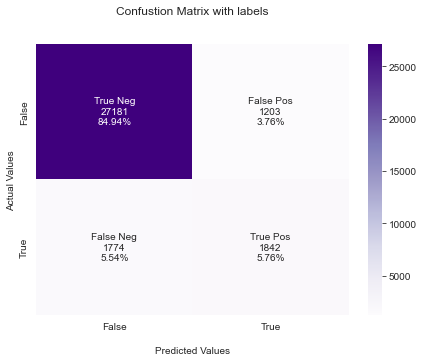

In [139]:
cmatrix = confusion_matrix(y_train, y_pred_cv)
print(cmatrix)

plot_CM(cmatrix)

In [140]:
# display accuracy, precision, recall, f1_score
scoresResult(y_train, y_pred_cv)

Scores Result: 
Training accuracy:  0.90696875
Precision =  0.6049261083743842
Recall =  0.5094026548672567
f1 score =  0.5530701095931541
  
              precision    recall  f1-score   support

       False       0.94      0.96      0.95     28384
        True       0.60      0.51      0.55      3616

    accuracy                           0.91     32000
   macro avg       0.77      0.73      0.75     32000
weighted avg       0.90      0.91      0.90     32000

AUC = 0.7335


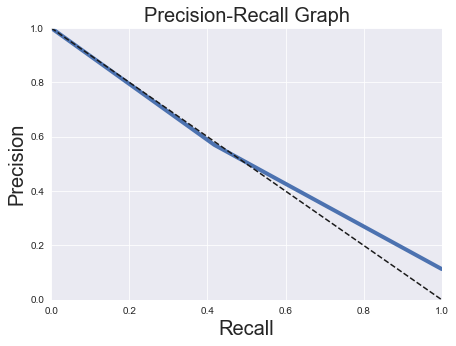

In [116]:
#PR curve
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred_cv)
pre_vs_rec(precisions, recalls)

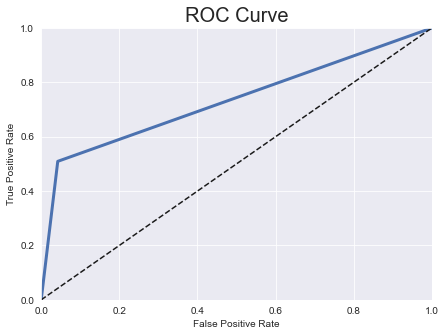

In [141]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_train,y_pred_cv)
plot_roc_curve(fpr, tpr)

#### 3.1.3 Measuring ideal output for comparison

In [142]:
dt_default = DecisionTreeClassifier(random_state = 41)
dt_default.fit(X_train_smo, y_train_smo)

default = dt_default.score(X_train_tr_pd, y_train)
y_pred = dt_default.predict(X_train_tr_pd)

In [143]:
#accuracy, precision, recall, f1_score
scoresResult(y_train, y_pred)

Scores Result: 
Training accuracy:  1.0
Precision =  1.0
Recall =  1.0
f1 score =  1.0
  
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     28384
        True       1.00      1.00      1.00      3616

    accuracy                           1.00     32000
   macro avg       1.00      1.00      1.00     32000
weighted avg       1.00      1.00      1.00     32000

AUC = 1.0000


[[28384     0]
 [    0  3616]]


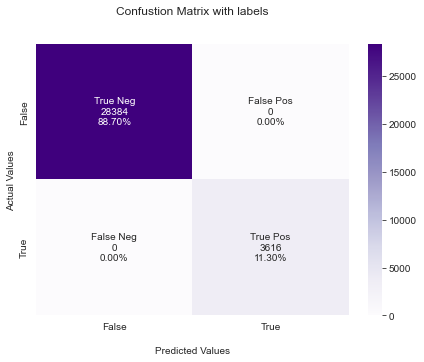

In [144]:
#confusion matrix
cmatrix = confusion_matrix(y_train, y_pred)
print(cmatrix)

plot_CM(cmatrix)

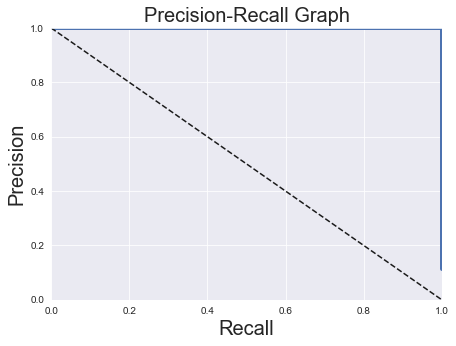

In [145]:
#pr curve
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred)
pre_vs_rec(precisions, recalls)

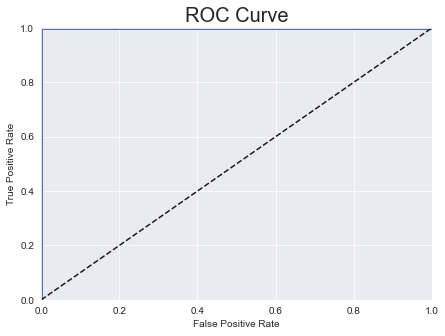

In [146]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_train,y_pred)
plot_roc_curve(fpr, tpr)

### 3.2 Model #2: Support Vector Machine(SVM)

#### 3.2.1 Training Model 

In [147]:
# train the model 
svc_clf = SVC()
svc_clf.fit(X_train_smo, y_train_smo)

# performance on training model
y_pred = svc_clf.predict(X_train_tr_pd)

print("Results: ")
showresult(y_train_smo, y_pred)

Results: 
Actual | Predicted
 
False       False
False       False
False       False
False       False
False       False
False       False
False       True
False       False
False       False
False       False
True       True
False       False
False       False
False       False
False       True
False       False
False       False
False       False
False       False
False       False
False       False
False       True
True       True
False       True
False       False
False       False
False       False
False       False
False       True
False       False


#### 3.2.2 Performance Measure

[[27660   724]
 [ 2219  1397]]


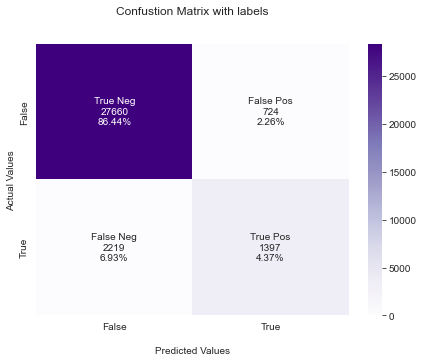

In [148]:
#use cross-validation to predict the labels of the training set through the command cross_val_predict.
y_pred_cv = cross_val_predict(svc_clf, X_train_tr_pd, y_train, cv=5)

#compute confusion matrix
cm= confusion_matrix(y_train, y_pred_cv)
print(cm)

plot_CM(cm)

In [149]:
#compute precision, recall, and f1 score
scoresResult(y_train, y_pred_cv)

Scores Result: 
Training accuracy:  0.90803125
Precision =  0.6586515794436586
Recall =  0.38633849557522126
f1 score =  0.4870141188774621
  
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     28384
        True       0.66      0.39      0.49      3616

    accuracy                           0.91     32000
   macro avg       0.79      0.68      0.72     32000
weighted avg       0.90      0.91      0.90     32000

AUC = 0.6804


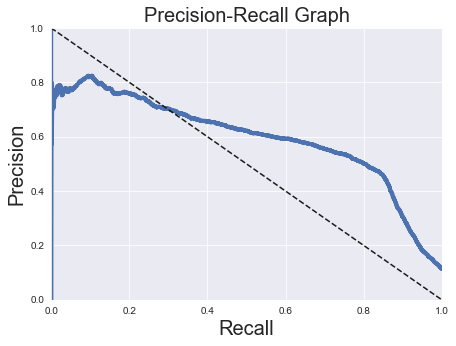

In [150]:
#pr curve
#retrieve the average cross-validated prediction score values for all samples 
y_scores_cv = cross_val_predict(svc_clf, X_train_tr_pd, y_train, cv=5, method='decision_function')
y_scores_cv

#compute precision-recall pairs for different threshold values 
precisions, recalls, thresholds = precision_recall_curve(y_train,  y_scores_cv)
pre_vs_rec(precisions, recalls)

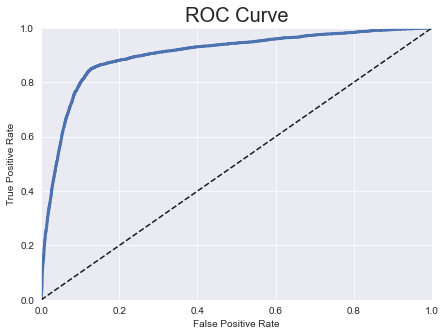

In [151]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_train,  y_scores_cv)
plot_roc_curve(fpr, tpr)

#### 3.2.3 Measuring ideal output for comparison

In [152]:
svc_clf_default = SVC(random_state = 42)
svc_clf_default.fit(X_train_smo, y_train_smo)

default = svc_clf_default.score(X_train_tr_pd, y_train)
y_pred = svc_clf_default.predict(X_train_tr_pd)

[[24459  3925]
 [  221  3395]]


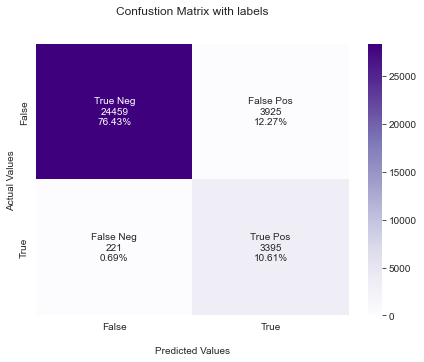

In [153]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

plot_CM(cm)

In [154]:
#accuracy, precision, recall, f1_score
scoresResult(y_train, y_pred)

Scores Result: 
Training accuracy:  0.8704375
Precision =  0.46379781420765026
Recall =  0.9388827433628318
f1 score =  0.6208851499634235
  
              precision    recall  f1-score   support

       False       0.99      0.86      0.92     28384
        True       0.46      0.94      0.62      3616

    accuracy                           0.87     32000
   macro avg       0.73      0.90      0.77     32000
weighted avg       0.93      0.87      0.89     32000

AUC = 0.9003


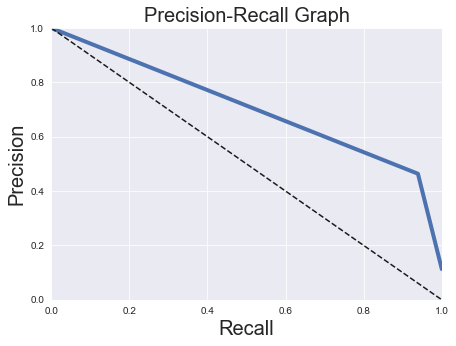

In [155]:
#pr curve
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred)
pre_vs_rec(precisions, recalls)

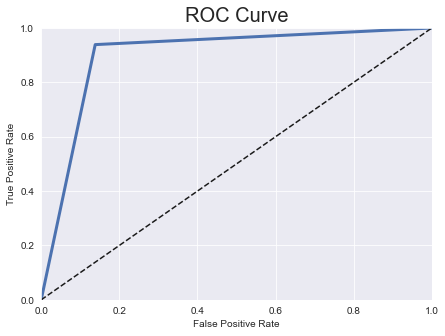

In [156]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_train,y_pred)
plot_roc_curve(fpr, tpr)

### 3.3 Model #3: KNNeighbor Classifier

#### 3.3.1 Training Model 

In [157]:
# train the model 
classifier= KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_smo, y_train_smo)

# performance on training model
y_pred=classifier.predict(X_train_tr_pd)

print("Results: ")
showresult(y_train_smo, y_pred)

Results: 
Actual | Predicted
 
False       False
False       False
False       False
False       False
False       False
False       False
False       False
False       True
False       False
True       True
False       False
False       True
False       False
False       False
True       True
False       False
False       False
False       False
True       True
False       False
False       True
False       False
False       False
False       True
False       False
False       False
False       False
False       True
False       False
False       False


#### 3.3.2 Performance Measure

[[27245  1139]
 [ 2106  1510]]


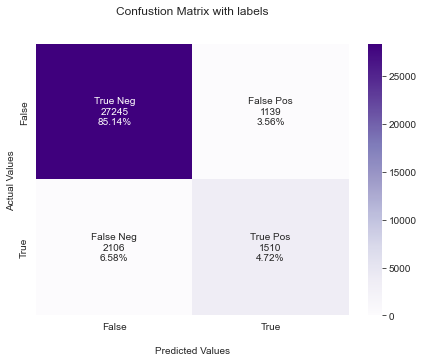

In [158]:
#generate predition score
y_pred_cv = cross_val_predict (classifier,X_train_tr,y_train, cv=5)

#compute confusion matrix
confusion_mat = confusion_matrix (y_train, y_pred_cv)
print(confusion_mat)

plot_CM(confusion_mat)

In [159]:
#accuracy
scoresResult(y_train, y_pred_cv)

Scores Result: 
Training accuracy:  0.89859375
Precision =  0.5700264250660627
Recall =  0.41758849557522126
f1 score =  0.48204309656823624
  
              precision    recall  f1-score   support

       False       0.93      0.96      0.94     28384
        True       0.57      0.42      0.48      3616

    accuracy                           0.90     32000
   macro avg       0.75      0.69      0.71     32000
weighted avg       0.89      0.90      0.89     32000

AUC = 0.6887


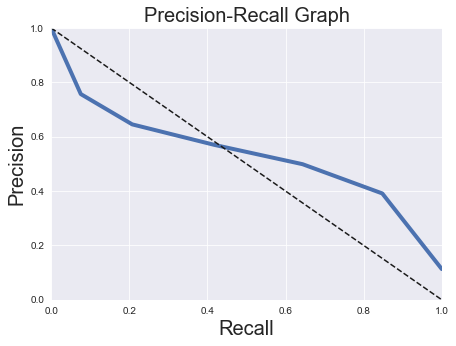

In [160]:
#pr curve
#retrieve the average cross-validated prediction score values for all samples 
y_scores_cv = cross_val_predict(classifier, X_train_tr, y_train, cv =5,method ='predict_proba' )
y_scores_cv = y_scores_cv[:, 1]

#compute precision-recall pairs for different threshold values 
precisions, recalls, thresholds = precision_recall_curve(y_train,  y_scores_cv)
pre_vs_rec(precisions, recalls)

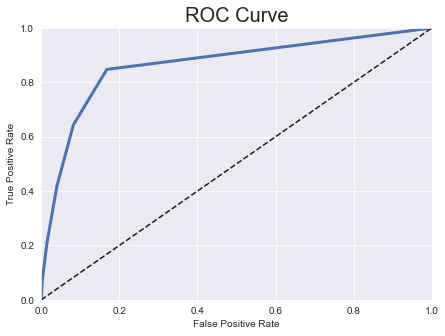

In [161]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_train,  y_scores_cv)
plot_roc_curve(fpr, tpr)

#### 3.3.3 Measuring ideal output for comparison

In [162]:
knn_default= KNeighborsClassifier()
knn_default.fit(X_train_smo, y_train_smo)

default = knn_default.score(X_train_tr_pd, y_train)
y_pred = knn_default.predict(X_train_tr_pd)

[[25181  3203]
 [   11  3605]]


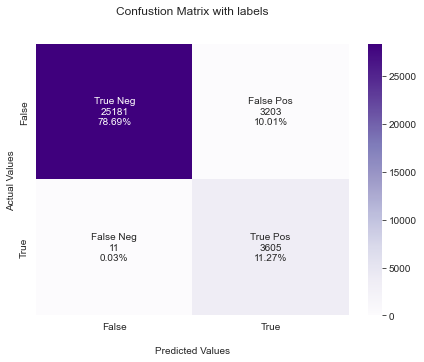

In [163]:
confusion_mat = confusion_matrix(y_train, y_pred)
print(confusion_mat)

plot_CM(confusion_mat)

In [164]:
#accuracy, precision, recall, f1_score
scoresResult(y_train, y_pred)

Scores Result: 
Training accuracy:  0.8995625
Precision =  0.529524089306698
Recall =  0.9969579646017699
f1 score =  0.6916730621642363
  
              precision    recall  f1-score   support

       False       1.00      0.89      0.94     28384
        True       0.53      1.00      0.69      3616

    accuracy                           0.90     32000
   macro avg       0.76      0.94      0.82     32000
weighted avg       0.95      0.90      0.91     32000

AUC = 0.9421


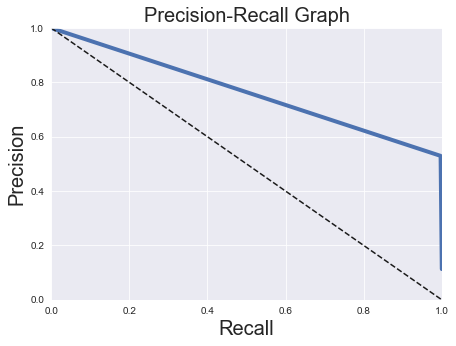

In [165]:
#pr curve
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred)
pre_vs_rec(precisions, recalls)

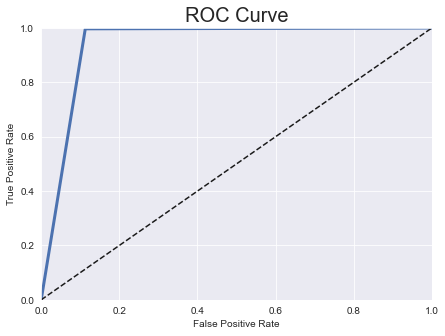

In [166]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_train,y_pred)
plot_roc_curve(fpr, tpr)

## 4.0 Fine-tune the model

### 4.1 Decision Tree

In [82]:
from sklearn.model_selection import GridSearchCV

tree_parameters={"splitter":["best","random"],
            "max_depth" : range(1,20),
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["log2","sqrt",None]}

tuning_model=GridSearchCV(tree,param_grid=tree_parameters,scoring='roc_auc',cv=5,verbose=3)
tuning_model.fit(X_train_tr_pd, y_train)

Fitting 5 folds for each of 1140 candidates, totalling 5700 fits
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.524 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.521 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.523 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.524 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.521 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=random;, score=0.593 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=random;, score=0.585 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=1, splitter=random;, score=0.605 total time=   0.0s
[CV 4/5] END max_depth=1, max_fea

[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.585 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.605 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.595 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.606 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.524 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.521 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.523 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.524 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.521 tot

[CV 2/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.521 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.523 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.524 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.521 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.593 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.585 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.605 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.595 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.606 t

[CV 2/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=best;, score=0.690 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=best;, score=0.712 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=best;, score=0.716 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=best;, score=0.684 total time=   0.0s
[CV 1/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=random;, score=0.647 total time=   0.0s
[CV 2/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=random;, score=0.624 total time=   0.0s
[CV 3/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=random;, score=0.659 total time=   0.0s
[CV 4/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=random;, score=0.648 total time=   0.0s
[CV 5/5] END max_depth=1, max_features=None, min_samples_leaf=4, splitter=random;, score=0.630 t

[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best;, score=0.602 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best;, score=0.611 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=best;, score=0.608 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.709 total time=   0.0s
[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.704 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.723 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.723 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.700 t

[CV 3/5] END max_depth=2, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.723 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.723 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.700 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.715 total time=   0.0s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.720 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.732 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.713 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.733 

[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.720 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.725 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.732 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.713 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.733 total time=   0.0s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.738 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.746 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.749 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.735 t

[CV 2/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=best;, score=0.824 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=best;, score=0.868 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=best;, score=0.843 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=best;, score=0.832 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=random;, score=0.744 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=random;, score=0.757 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=random;, score=0.760 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=None, min_samples_leaf=7, splitter=random;, score=0.737 t

[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.617 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.611 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.622 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.616 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random;, score=0.745 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random;, score=0.760 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random;, score=0.763 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=log2, min_samples_leaf=5, splitter=random;, score=0.757 t

[CV 4/5] END max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.759 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best;, score=0.769 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best;, score=0.762 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best;, score=0.779 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best;, score=0.779 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random;, score=0.742 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, min_samples_leaf=3, splitter=random;, score=0.742 tot

[CV 4/5] END max_depth=3, max_features=sqrt, min_samples_leaf=10, splitter=random;, score=0.759 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, min_samples_leaf=10, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, min_samples_leaf=1, splitter=best;, score=0.892 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, min_samples_leaf=1, splitter=best;, score=0.867 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, min_samples_leaf=1, splitter=best;, score=0.910 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, min_samples_leaf=1, splitter=best;, score=0.880 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, min_samples_leaf=1, splitter=best;, score=0.875 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, min_samples_leaf=1, splitter=random;, score=0.756 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, min_samples_leaf=1, splitter=random;, score=0.704 t

[CV 5/5] END max_depth=3, max_features=None, min_samples_leaf=8, splitter=best;, score=0.875 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, min_samples_leaf=8, splitter=random;, score=0.756 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, min_samples_leaf=8, splitter=random;, score=0.704 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, min_samples_leaf=8, splitter=random;, score=0.769 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=None, min_samples_leaf=8, splitter=random;, score=0.782 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=None, min_samples_leaf=8, splitter=random;, score=0.700 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=None, min_samples_leaf=9, splitter=best;, score=0.892 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=None, min_samples_leaf=9, splitter=best;, score=0.867 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=None, min_samples_leaf=9, splitter=best;, score=0.910 t

[CV 3/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.776 total time=   0.0s
[CV 5/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=best;, score=0.753 total time=   0.0s
[CV 1/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random;, score=0.753 total time=   0.0s
[CV 2/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random;, score=0.764 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random;, score=0.666 total time=   0.0s
[CV 5/5] END max_depth=4, max_features=log2, min_samples_leaf=6, splitter=random;, score=0.741 total time=   0.0s
[CV 1/5] END max_depth=4, max_features=log2, min_samples_leaf=7, splitter=best;, score=0.768 t

[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random;, score=0.774 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random;, score=0.779 total time=   0.0s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_leaf=4, splitter=random;, score=0.718 total time=   0.0s
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best;, score=0.878 total time=   0.0s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best;, score=0.765 total time=   0.0s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best;, score=0.790 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_leaf=5, splitter=best;, score=0.764 tot

[CV 1/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=best;, score=0.919 total time=   0.0s
[CV 2/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=best;, score=0.901 total time=   0.0s
[CV 3/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=best;, score=0.913 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=best;, score=0.914 total time=   0.0s
[CV 5/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=best;, score=0.899 total time=   0.0s
[CV 1/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=random;, score=0.870 total time=   0.0s
[CV 2/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=random;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=None, min_samples_leaf=2, splitter=random;, score=0.830 tot

[CV 3/5] END max_depth=4, max_features=None, min_samples_leaf=9, splitter=random;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=None, min_samples_leaf=9, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END max_depth=4, max_features=None, min_samples_leaf=9, splitter=random;, score=0.769 total time=   0.0s
[CV 1/5] END max_depth=4, max_features=None, min_samples_leaf=10, splitter=best;, score=0.919 total time=   0.0s
[CV 2/5] END max_depth=4, max_features=None, min_samples_leaf=10, splitter=best;, score=0.901 total time=   0.0s
[CV 3/5] END max_depth=4, max_features=None, min_samples_leaf=10, splitter=best;, score=0.913 total time=   0.0s
[CV 4/5] END max_depth=4, max_features=None, min_samples_leaf=10, splitter=best;, score=0.914 total time=   0.0s
[CV 5/5] END max_depth=4, max_features=None, min_samples_leaf=10, splitter=best;, score=0.902 total time=   0.0s
[CV 1/5] END max_depth=4, max_features=None, min_samples_leaf=10, splitter=random;, score=0.8

[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random;, score=0.709 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random;, score=0.678 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=7, splitter=random;, score=0.666 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.799 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.780 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.820 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.766 tot

[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.771 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.771 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.782 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.850 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.879 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.844 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.853 tot

[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=best;, score=0.906 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=best;, score=0.932 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=best;, score=0.914 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=best;, score=0.906 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=random;, score=0.861 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=random;, score=0.885 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=random;, score=0.877 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=3, splitter=random;, score=0.888 t

[CV 1/5] END max_depth=5, max_features=None, min_samples_leaf=10, splitter=random;, score=0.909 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=None, min_samples_leaf=10, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=None, min_samples_leaf=10, splitter=random;, score=0.889 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=None, min_samples_leaf=10, splitter=random;, score=0.887 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=None, min_samples_leaf=10, splitter=random;, score=0.868 total time=   0.0s
[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.785 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END max_depth=6, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.876 total time=   0.0s
[CV 4/5] END max_depth=6, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.

[CV 4/5] END max_depth=6, max_features=log2, min_samples_leaf=7, splitter=random;, score=0.767 total time=   0.0s
[CV 5/5] END max_depth=6, max_features=log2, min_samples_leaf=7, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.851 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.760 total time=   0.0s
[CV 3/5] END max_depth=6, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.765 total time=   0.0s
[CV 4/5] END max_depth=6, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END max_depth=6, max_features=log2, min_samples_leaf=8, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.776 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.771 tot

[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, splitter=best;, score=0.878 total time=   0.0s
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.763 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.779 total time=   0.0s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.799 total time=   0.0s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.797 total time=   0.0s
[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=5, splitter=random;, score=0.789 total time=   0.0s
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.867 total time=   0.0s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=6, splitter=best;, score=0.905 t

[CV 1/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=best;, score=0.926 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=best;, score=0.905 total time=   0.0s
[CV 3/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=best;, score=0.932 total time=   0.0s
[CV 4/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=best;, score=0.914 total time=   0.0s
[CV 5/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=best;, score=0.916 total time=   0.0s
[CV 1/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=random;, score=0.912 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=random;, score=0.846 total time=   0.0s
[CV 3/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=random;, score=0.917 total time=   0.0s
[CV 4/5] END max_depth=6, max_features=None, min_samples_leaf=3, splitter=random;, score=0.902 tot

[CV 5/5] END max_depth=6, max_features=None, min_samples_leaf=10, splitter=best;, score=0.919 total time=   0.0s
[CV 1/5] END max_depth=6, max_features=None, min_samples_leaf=10, splitter=random;, score=0.923 total time=   0.0s
[CV 2/5] END max_depth=6, max_features=None, min_samples_leaf=10, splitter=random;, score=0.906 total time=   0.0s
[CV 3/5] END max_depth=6, max_features=None, min_samples_leaf=10, splitter=random;, score=0.859 total time=   0.0s
[CV 4/5] END max_depth=6, max_features=None, min_samples_leaf=10, splitter=random;, score=0.866 total time=   0.0s
[CV 5/5] END max_depth=6, max_features=None, min_samples_leaf=10, splitter=random;, score=0.880 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.830 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best;, score=0.794 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=1, splitter=best;, score=0

[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.717 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.733 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.739 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.849 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=log2, min_samples_leaf=8, splitter=random;, score=0.799 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.765 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.813 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=log2, min_samples_leaf=9, splitter=best;, score=0.778 t

[CV 3/5] END max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.789 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.815 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=sqrt, min_samples_leaf=6, splitter=random;, score=0.761 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best;, score=0.864 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best;, score=0.873 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best;, score=0.881 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best;, score=0.847 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=best;, score=0.869 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=sqrt, min_samples_leaf=7, splitter=random;, score=0.775 tot

[CV 2/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=best;, score=0.908 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=best;, score=0.932 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=best;, score=0.915 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=best;, score=0.916 total time=   0.0s
[CV 1/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=random;, score=0.927 total time=   0.0s
[CV 2/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=random;, score=0.775 total time=   0.0s
[CV 3/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=random;, score=0.921 total time=   0.0s
[CV 4/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=random;, score=0.922 total time=   0.0s
[CV 5/5] END max_depth=7, max_features=None, min_samples_leaf=4, splitter=random;, score=0.820 t

[CV 3/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.765 total time=   0.0s
[CV 2/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.845 total time=   0.0s
[CV 3/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.799 total time=   0.0s
[CV 4/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END max_depth=8, max_features=log2, min_samples_leaf=2, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_leaf=3, splitter=best;, score=0.852 t

[CV 5/5] END max_depth=8, max_features=log2, min_samples_leaf=10, splitter=best;, score=0.838 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.773 total time=   0.0s
[CV 3/5] END max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.911 total time=   0.0s
[CV 5/5] END max_depth=8, max_features=log2, min_samples_leaf=10, splitter=random;, score=0.776 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.866 total time=   0.0s
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0

[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=best;, score=0.883 total time=   0.0s
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=best;, score=0.907 total time=   0.0s
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=best;, score=0.893 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.778 total time=   0.0s
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.787 total time=   0.0s
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.797 total time=   0.0s
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.742 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.898 t

[CV 5/5] END max_depth=8, max_features=None, min_samples_leaf=5, splitter=random;, score=0.906 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=best;, score=0.930 total time=   0.0s
[CV 2/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=best;, score=0.907 total time=   0.0s
[CV 3/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=best;, score=0.932 total time=   0.0s
[CV 4/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=best;, score=0.913 total time=   0.0s
[CV 5/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=best;, score=0.910 total time=   0.0s
[CV 1/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=random;, score=0.920 total time=   0.0s
[CV 2/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=random;, score=0.917 total time=   0.0s
[CV 3/5] END max_depth=8, max_features=None, min_samples_leaf=6, splitter=random;, score=0.914 tot

[CV 5/5] END max_depth=9, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.881 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.895 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.919 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.837 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.874 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.817 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.774 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.780 tot

[CV 5/5] END max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.870 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.810 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.743 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.781 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.863 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.830 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.891 t

[CV 5/5] END max_depth=9, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.780 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.905 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.846 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.873 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.905 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.866 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.763 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.803 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.843 tot

[CV 3/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=best;, score=0.922 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=best;, score=0.907 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=best;, score=0.899 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=random;, score=0.910 total time=   0.0s
[CV 2/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=random;, score=0.917 total time=   0.0s
[CV 3/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=random;, score=0.937 total time=   0.0s
[CV 4/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=random;, score=0.930 total time=   0.0s
[CV 5/5] END max_depth=9, max_features=None, min_samples_leaf=6, splitter=random;, score=0.921 total time=   0.0s
[CV 1/5] END max_depth=9, max_features=None, min_samples_leaf=7, splitter=best;, score=0.910 t

[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.800 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.778 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.863 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.836 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.807 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.781 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.825 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=4, splitter=best;, score=

[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.833 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.790 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.793 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.813 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.841 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.858 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.836 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.869 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, splitter=best;, scor

[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.861 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.867 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.813 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.882 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.832 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.886 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.792 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=

[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=best;, score=0.875 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=best;, score=0.896 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=best;, score=0.901 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=best;, score=0.897 total time=   0.0s
[CV 1/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=random;, score=0.926 total time=   0.0s
[CV 2/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=random;, score=0.915 total time=   0.0s
[CV 3/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=random;, score=0.932 total time=   0.0s
[CV 4/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=random;, score=0.917 total time=   0.0s
[CV 5/5] END max_depth=10, max_features=None, min_samples_leaf=6, splitter=random;, scor

[CV 4/5] END max_depth=11, max_features=log2, min_samples_leaf=3, splitter=best;, score=0.859 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=log2, min_samples_leaf=3, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.794 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.791 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.906 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=log2, min_samples_leaf=4, splitter=best;, scor

[CV 1/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.855 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.865 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.788 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.840 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=

[CV 3/5] END max_depth=11, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.910 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.818 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.831 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.901 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.892 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.925 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.857 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.892 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=

[CV 1/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=best;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=best;, score=0.863 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=best;, score=0.899 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=best;, score=0.891 total time=   0.0s
[CV 5/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=best;, score=0.875 total time=   0.0s
[CV 1/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=random;, score=0.915 total time=   0.0s
[CV 2/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=random;, score=0.894 total time=   0.0s
[CV 3/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=random;, score=0.916 total time=   0.0s
[CV 4/5] END max_depth=11, max_features=None, min_samples_leaf=6, splitter=random;, score=

[CV 5/5] END max_depth=12, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.885 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.905 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.889 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.890 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.826 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.887 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.818 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.782 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=log2, min_samples_leaf=4, splitter=random;, score=

[CV 5/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.800 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.864 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.803 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.823 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.878 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.810 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.848 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.818 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, splitter=best;, scor

[CV 5/5] END max_depth=12, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.838 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.832 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.817 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.881 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.810 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.821 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.884 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=sqrt, min_samples_leaf=10, splitter=best;, s

[CV 2/5] END max_depth=12, max_features=None, min_samples_leaf=6, splitter=random;, score=0.915 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, min_samples_leaf=6, splitter=random;, score=0.930 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, min_samples_leaf=6, splitter=random;, score=0.911 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, min_samples_leaf=6, splitter=random;, score=0.900 total time=   0.0s
[CV 1/5] END max_depth=12, max_features=None, min_samples_leaf=7, splitter=best;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=12, max_features=None, min_samples_leaf=7, splitter=best;, score=0.879 total time=   0.0s
[CV 3/5] END max_depth=12, max_features=None, min_samples_leaf=7, splitter=best;, score=0.893 total time=   0.0s
[CV 4/5] END max_depth=12, max_features=None, min_samples_leaf=7, splitter=best;, score=0.897 total time=   0.0s
[CV 5/5] END max_depth=12, max_features=None, min_samples_leaf=7, splitter=best;, score=

[CV 5/5] END max_depth=13, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.854 total time=   0.0s
[CV 1/5] END max_depth=13, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.778 total time=   0.0s
[CV 2/5] END max_depth=13, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.775 total time=   0.0s
[CV 3/5] END max_depth=13, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.869 total time=   0.0s
[CV 4/5] END max_depth=13, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END max_depth=13, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.818 total time=   0.0s
[CV 1/5] END max_depth=13, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.845 total time=   0.0s
[CV 2/5] END max_depth=13, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.853 total time=   0.0s
[CV 3/5] END max_depth=13, max_features=log2, min_samples_leaf=5, splitter=best;, scor

[CV 1/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.833 total time=   0.0s
[CV 4/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.826 total time=   0.0s
[CV 5/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.864 total time=   0.0s
[CV 1/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.800 total time=   0.0s
[CV 2/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.794 total time=   0.0s
[CV 3/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.813 total time=   0.0s
[CV 4/5] END max_depth=13, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=

[CV 3/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.922 total time=   0.0s
[CV 4/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.863 total time=   0.0s
[CV 5/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.858 total time=   0.0s
[CV 1/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.813 total time=   0.0s
[CV 3/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.797 total time=   0.0s
[CV 4/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.804 total time=   0.0s
[CV 5/5] END max_depth=13, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.802 total time=   0.0s
[CV 1/5] END max_depth=13, max_features=sqrt, min_samples_leaf=10, splitter=best;, sco

[CV 5/5] END max_depth=13, max_features=None, min_samples_leaf=6, splitter=best;, score=0.863 total time=   0.0s
[CV 1/5] END max_depth=13, max_features=None, min_samples_leaf=6, splitter=random;, score=0.899 total time=   0.0s
[CV 2/5] END max_depth=13, max_features=None, min_samples_leaf=6, splitter=random;, score=0.890 total time=   0.0s
[CV 3/5] END max_depth=13, max_features=None, min_samples_leaf=6, splitter=random;, score=0.927 total time=   0.0s
[CV 4/5] END max_depth=13, max_features=None, min_samples_leaf=6, splitter=random;, score=0.896 total time=   0.0s
[CV 5/5] END max_depth=13, max_features=None, min_samples_leaf=6, splitter=random;, score=0.890 total time=   0.0s
[CV 1/5] END max_depth=13, max_features=None, min_samples_leaf=7, splitter=best;, score=0.886 total time=   0.0s
[CV 2/5] END max_depth=13, max_features=None, min_samples_leaf=7, splitter=best;, score=0.871 total time=   0.0s
[CV 3/5] END max_depth=13, max_features=None, min_samples_leaf=7, splitter=best;, scor

[CV 4/5] END max_depth=14, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.891 total time=   0.0s
[CV 5/5] END max_depth=14, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.842 total time=   0.0s
[CV 1/5] END max_depth=14, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.786 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.844 total time=   0.0s
[CV 3/5] END max_depth=14, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.802 total time=   0.0s
[CV 4/5] END max_depth=14, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.799 total time=   0.0s
[CV 5/5] END max_depth=14, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.779 total time=   0.0s
[CV 1/5] END max_depth=14, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.844 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=log2, min_samples_leaf=5, splitter=best;, scor

[CV 1/5] END max_depth=14, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END max_depth=14, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.782 total time=   0.0s
[CV 4/5] END max_depth=14, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.756 total time=   0.0s
[CV 5/5] END max_depth=14, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.815 total time=   0.0s
[CV 1/5] END max_depth=14, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.834 total time=   0.0s
[CV 3/5] END max_depth=14, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END max_depth=14, max_features=sqrt, min_samples_leaf=2, splitter=best;, scor

[CV 1/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.863 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.895 total time=   0.0s
[CV 3/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.867 total time=   0.0s
[CV 4/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.886 total time=   0.0s
[CV 5/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.851 total time=   0.0s
[CV 1/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.806 total time=   0.0s
[CV 3/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.875 total time=   0.0s
[CV 4/5] END max_depth=14, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=

[CV 4/5] END max_depth=14, max_features=None, min_samples_leaf=6, splitter=best;, score=0.882 total time=   0.0s
[CV 5/5] END max_depth=14, max_features=None, min_samples_leaf=6, splitter=best;, score=0.861 total time=   0.0s
[CV 1/5] END max_depth=14, max_features=None, min_samples_leaf=6, splitter=random;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=None, min_samples_leaf=6, splitter=random;, score=0.888 total time=   0.0s
[CV 3/5] END max_depth=14, max_features=None, min_samples_leaf=6, splitter=random;, score=0.902 total time=   0.0s
[CV 4/5] END max_depth=14, max_features=None, min_samples_leaf=6, splitter=random;, score=0.901 total time=   0.0s
[CV 5/5] END max_depth=14, max_features=None, min_samples_leaf=6, splitter=random;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=14, max_features=None, min_samples_leaf=7, splitter=best;, score=0.888 total time=   0.0s
[CV 2/5] END max_depth=14, max_features=None, min_samples_leaf=7, splitter=best;, scor

[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.829 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.852 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.820 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.788 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.805 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.905 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=log2, min_samples_leaf=5, splitter=best;, scor

[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.800 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.829 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.834 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.838 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.769 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.865 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.813 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=

[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.889 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.879 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.861 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.858 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.855 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.819 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.833 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.836 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=sqrt, min_samples_leaf=10, splitter=best;, sco

[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=6, splitter=best;, score=0.858 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=6, splitter=random;, score=0.898 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=6, splitter=random;, score=0.889 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=6, splitter=random;, score=0.905 total time=   0.0s
[CV 4/5] END max_depth=15, max_features=None, min_samples_leaf=6, splitter=random;, score=0.887 total time=   0.0s
[CV 5/5] END max_depth=15, max_features=None, min_samples_leaf=6, splitter=random;, score=0.895 total time=   0.0s
[CV 1/5] END max_depth=15, max_features=None, min_samples_leaf=7, splitter=best;, score=0.887 total time=   0.0s
[CV 2/5] END max_depth=15, max_features=None, min_samples_leaf=7, splitter=best;, score=0.855 total time=   0.0s
[CV 3/5] END max_depth=15, max_features=None, min_samples_leaf=7, splitter=best;, scor

[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.768 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.866 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=3, splitter=random;, score=0.792 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.882 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.816 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.857 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=log2, min_samples_leaf=4, splitter=best;, score=

[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.805 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.762 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.779 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.824 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.752 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.771 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=2, splitter=best;, scor

[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=8, splitter=random;, score=0.837 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.912 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.896 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.882 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.869 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.870 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.887 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=

[CV 3/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=best;, score=0.873 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=best;, score=0.861 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=best;, score=0.861 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=random;, score=0.903 total time=   0.0s
[CV 2/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=random;, score=0.875 total time=   0.0s
[CV 3/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=random;, score=0.908 total time=   0.0s
[CV 4/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=random;, score=0.882 total time=   0.0s
[CV 5/5] END max_depth=16, max_features=None, min_samples_leaf=6, splitter=random;, score=0.881 total time=   0.0s
[CV 1/5] END max_depth=16, max_features=None, min_samples_leaf=7, splitter=best;, scor

[CV 2/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.834 total time=   0.0s
[CV 3/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.801 total time=   0.0s
[CV 4/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.880 total time=   0.0s
[CV 5/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.857 total time=   0.0s
[CV 1/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.831 total time=   0.0s
[CV 4/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END max_depth=17, max_features=log2, min_samples_leaf=4, splitter=random;, scor

[CV 5/5] END max_depth=17, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.739 total time=   0.0s
[CV 1/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.828 total time=   0.0s
[CV 2/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.739 total time=   0.0s
[CV 2/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.783 total time=   0.0s
[CV 3/5] END max_depth=17, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=

[CV 3/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.877 total time=   0.0s
[CV 4/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.898 total time=   0.0s
[CV 5/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=best;, score=0.891 total time=   0.0s
[CV 1/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.879 total time=   0.0s
[CV 2/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.840 total time=   0.0s
[CV 3/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.861 total time=   0.0s
[CV 4/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.833 total time=   0.0s
[CV 5/5] END max_depth=17, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.812 total time=   0.0s
[CV 1/5] END max_depth=17, max_features=sqrt, min_samples_leaf=10, splitter=best;, sco

[CV 5/5] END max_depth=17, max_features=None, min_samples_leaf=6, splitter=best;, score=0.858 total time=   0.0s
[CV 1/5] END max_depth=17, max_features=None, min_samples_leaf=6, splitter=random;, score=0.904 total time=   0.0s
[CV 2/5] END max_depth=17, max_features=None, min_samples_leaf=6, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END max_depth=17, max_features=None, min_samples_leaf=6, splitter=random;, score=0.897 total time=   0.0s
[CV 4/5] END max_depth=17, max_features=None, min_samples_leaf=6, splitter=random;, score=0.889 total time=   0.0s
[CV 5/5] END max_depth=17, max_features=None, min_samples_leaf=6, splitter=random;, score=0.881 total time=   0.0s
[CV 1/5] END max_depth=17, max_features=None, min_samples_leaf=7, splitter=best;, score=0.883 total time=   0.0s
[CV 2/5] END max_depth=17, max_features=None, min_samples_leaf=7, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END max_depth=17, max_features=None, min_samples_leaf=7, splitter=best;, scor

[CV 4/5] END max_depth=18, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.875 total time=   0.0s
[CV 5/5] END max_depth=18, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.848 total time=   0.0s
[CV 1/5] END max_depth=18, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.795 total time=   0.0s
[CV 2/5] END max_depth=18, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.858 total time=   0.0s
[CV 3/5] END max_depth=18, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.815 total time=   0.0s
[CV 4/5] END max_depth=18, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END max_depth=18, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.829 total time=   0.0s
[CV 1/5] END max_depth=18, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END max_depth=18, max_features=log2, min_samples_leaf=5, splitter=best;, scor

[CV 1/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.807 total time=   0.0s
[CV 2/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.790 total time=   0.0s
[CV 3/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.833 total time=   0.0s
[CV 1/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.810 total time=   0.0s
[CV 3/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.803 total time=   0.0s
[CV 4/5] END max_depth=18, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=

[CV 4/5] END max_depth=18, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.875 total time=   0.0s
[CV 5/5] END max_depth=18, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.867 total time=   0.0s
[CV 1/5] END max_depth=18, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.896 total time=   0.0s
[CV 2/5] END max_depth=18, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.868 total time=   0.0s
[CV 3/5] END max_depth=18, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.905 total time=   0.0s
[CV 4/5] END max_depth=18, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.880 total time=   0.0s
[CV 5/5] END max_depth=18, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.906 total time=   0.0s
[CV 1/5] END max_depth=18, max_features=sqrt, min_samples_leaf=10, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END max_depth=18, max_features=sqrt, min_samples_leaf=10, splitter=random;,

[CV 2/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=best;, score=0.889 total time=   0.0s
[CV 4/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=best;, score=0.868 total time=   0.0s
[CV 5/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=best;, score=0.862 total time=   0.0s
[CV 1/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=random;, score=0.893 total time=   0.0s
[CV 2/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=random;, score=0.897 total time=   0.0s
[CV 3/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=random;, score=0.899 total time=   0.0s
[CV 4/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=random;, score=0.893 total time=   0.0s
[CV 5/5] END max_depth=18, max_features=None, min_samples_leaf=7, splitter=random;, scor

[CV 4/5] END max_depth=19, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.821 total time=   0.0s
[CV 5/5] END max_depth=19, max_features=log2, min_samples_leaf=4, splitter=best;, score=0.843 total time=   0.0s
[CV 1/5] END max_depth=19, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.810 total time=   0.0s
[CV 2/5] END max_depth=19, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.801 total time=   0.0s
[CV 3/5] END max_depth=19, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.798 total time=   0.0s
[CV 4/5] END max_depth=19, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END max_depth=19, max_features=log2, min_samples_leaf=4, splitter=random;, score=0.794 total time=   0.0s
[CV 1/5] END max_depth=19, max_features=log2, min_samples_leaf=5, splitter=best;, score=0.834 total time=   0.0s
[CV 2/5] END max_depth=19, max_features=log2, min_samples_leaf=5, splitter=best;, scor

[CV 5/5] END max_depth=19, max_features=sqrt, min_samples_leaf=1, splitter=random;, score=0.698 total time=   0.0s
[CV 1/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.795 total time=   0.0s
[CV 3/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=best;, score=0.808 total time=   0.0s
[CV 1/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.850 total time=   0.0s
[CV 2/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=0.810 total time=   0.0s
[CV 3/5] END max_depth=19, max_features=sqrt, min_samples_leaf=2, splitter=random;, score=

[CV 4/5] END max_depth=19, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END max_depth=19, max_features=sqrt, min_samples_leaf=9, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END max_depth=19, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.876 total time=   0.0s
[CV 2/5] END max_depth=19, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.884 total time=   0.0s
[CV 3/5] END max_depth=19, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.901 total time=   0.0s
[CV 4/5] END max_depth=19, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.885 total time=   0.0s
[CV 5/5] END max_depth=19, max_features=sqrt, min_samples_leaf=10, splitter=best;, score=0.888 total time=   0.0s
[CV 1/5] END max_depth=19, max_features=sqrt, min_samples_leaf=10, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END max_depth=19, max_features=sqrt, min_samples_leaf=10, splitter=random;,

[CV 2/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=best;, score=0.851 total time=   0.0s
[CV 3/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=best;, score=0.888 total time=   0.0s
[CV 4/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=best;, score=0.868 total time=   0.0s
[CV 5/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=best;, score=0.864 total time=   0.0s
[CV 1/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=random;, score=0.898 total time=   0.0s
[CV 2/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=random;, score=0.888 total time=   0.0s
[CV 3/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=random;, score=0.903 total time=   0.0s
[CV 4/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=random;, score=0.906 total time=   0.0s
[CV 5/5] END max_depth=19, max_features=None, min_samples_leaf=7, splitter=random;, scor

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=15,
                                              random_state=101),
             param_grid={'max_depth': range(1, 20),
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='roc_auc', verbose=3)

In [91]:
print('Best parameter: ',tuning_model.best_params_)
print('Best estimator: ',tuning_model.best_estimator_)
print('Best score: ', tuning_model.best_score_)

tree_best = tuning_model.best_estimator_

Best parameter:  {'max_depth': 11, 'max_features': None, 'min_samples_leaf': 10, 'splitter': 'random'}
Best estimator:  DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, random_state=101,
                       splitter='random')
Best score:  0.9255950676215964


### 4.2 SVM

In [21]:
from sklearn.model_selection import GridSearchCV

# defining parameter
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train_smo, y_train_smo)

# print best parameter after tuning
print(grid.best_params_)

# print how the model looks after tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.861 total time= 2.7min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time= 2.9min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time= 2.9min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time= 2.8min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.855 total time= 4.0min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.888 total time= 1.4min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.891 total time= 1.2min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.897 total time= 1.1min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.898 total time= 1.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time= 1.0min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.877 total time= 1.1min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.974 total time= 9.0min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.975 total time= 9.1min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.976 total time=10.7min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.974 total time= 7.2min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.899 total time= 2.3min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.957 total time= 3.4min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.962 total time= 3.4min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.963 total time= 3.2min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.959 total time= 3.5min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.867 total time= 4.0min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.943 total time= 6.0min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.948 total time= 5.9min
[CV 4/5] END ....C=1000, gam

In [92]:
print('Best parameter: ',grid.best_params_)
print('Best estimator: ',grid.best_estimator_)
print('Best score: ', grid.best_score_)

svm_best = grid.best_estimator_

Best parameter:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best estimator:  SVC(C=10, gamma=1)
Best score:  0.9764127764013398


### 4.3 KNNeigbor Classifier

In [84]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train_smo, y_train_smo)

#Print The value of best Hyperparameters
print('Best estimator:', g_res.best_estimator_)
print('Best parameter:', g_res.best_params_)
print('Best score:', g_res.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best estimator: KNeighborsClassifier(metric='manhattan', weights='distance')
Best parameter: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score: 0.9417629910809109


In [95]:
knn_best = g_res.best_estimator_

## 5.0 Evaluate system on unseen data

### 5.1 Preprocessing the testing set

In [98]:
#split numerical and categorical data
x_test_num = x_test.drop(['x2','x3', 'x4','x5','x6','x7','x8'], axis=1)
x_test_cat = x_test[['x2','x3', 'x4','x5','x6','x7','x8']]
print('x_train_num shape:', x_test_num.shape)
print('x_train_cat shape:', x_test_cat.shape)

x_train_num shape: (8000, 10)
x_train_cat shape: (8000, 7)


In [101]:
##handle missing value for numerical data
#find missing value
print('Number of missing values for all columns:', x_test_num.isnull().sum())

#fill in missing value
x_test_num_tr = imputer.transform(x_test_num)

#check if missing values still exists
print('Number of missing values after filled in missing value:')
x_test_num_tr_pd = pd.DataFrame(x_test_num_tr, columns = x_test_num.columns)
x_test_num_tr_pd.isnull().sum()

Number of missing values for all columns: x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    1
x15    0
x16    0
x17    0
dtype: int64
Number of missing values after filled in missing value:


x1     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
dtype: int64

In [102]:
#standardization   
x_test_num_tr = scaler.transform(x_test_num_tr)
print('Mean of all columns:\n', x_test_num_tr.mean(axis = 0))
print('\nStd of all columns:\n', x_test_num_tr.std(axis = 0))

Mean of all columns:
 [-0.00076007 -0.0026751   0.01313484 -0.00725553  0.01187961 -0.00378752
 -0.00879129 -0.00822876 -0.0048387  -0.00111289]

Std of all columns:
 [1.00669792 0.97986589 1.06298916 1.01754308 1.03836937 1.00004585
 1.00350456 0.99850963 1.00065249 1.00147473]


In [103]:
##handle missing value for categorical data
#find missing value in categorical data
print('Number of missing values for all categorical columns: ', x_test_cat.isnull().sum())

#fill in missing value
x_test_cat_tr = imputer_cat.transform(x_test_cat)

#check if missing values still exists
print('Number of missing values after filled in missing value:')
x_test_cat_pd = pd.DataFrame(x_test_cat_tr, columns = x_test_cat.columns)
x_test_cat_tr_pd = pd.get_dummies(x_test_cat_pd)
print(x_test_cat_tr_pd.isnull().sum())


Number of missing values for all categorical columns:  x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
dtype: int64
Number of missing values after filled in missing value:
x2_admin            0
x2_blue-collar      0
x2_entrepreneur     0
x2_housemaid        0
x2_management       0
x2_retired          0
x2_self-employed    0
x2_services         0
x2_student          0
x2_technician       0
x2_unemployed       0
x2_unknown          0
x3_divorced         0
x3_married          0
x3_single           0
x3_unknown          0
x4_high             0
x4_illiterate       0
x4_middle           0
x4_primary          0
x4_professional     0
x4_university       0
x4_unknown          0
x5_no               0
x5_unknown          0
x5_yes              0
x6_no               0
x6_unknown          0
x6_yes              0
x7_apr              0
x7_aug              0
x7_dec              0
x7_jul              0
x7_jun              0
x7_mar              0
x7_may              0
x7_nov              0
x7_oct

In [105]:
#finalize testing set
X_test_tr = np.hstack([x_test_num_tr,x_test_cat_tr_pd.values])
X_test_tr_pd = pd.DataFrame(X_test_tr, columns = np.hstack([num_col, x_test_cat_tr_pd.columns.values]))
print('X_test_tr shape:', X_test_tr_pd.shape)
print('y_test shape:', y_test.shape)

X_test_tr shape: (8000, 51)
y_test shape: (8000,)


### 5.2 Predict on the testing set

Decision tree: 
Scores Result: 
Training accuracy:  0.9105
Precision =  0.6336779911373708
Recall =  0.4782608695652174
f1 score =  0.5451080050825922
  
              precision    recall  f1-score   support

       False       0.94      0.97      0.95      7103
        True       0.63      0.48      0.55       897

    accuracy                           0.91      8000
   macro avg       0.78      0.72      0.75      8000
weighted avg       0.90      0.91      0.90      8000

AUC = 0.7217


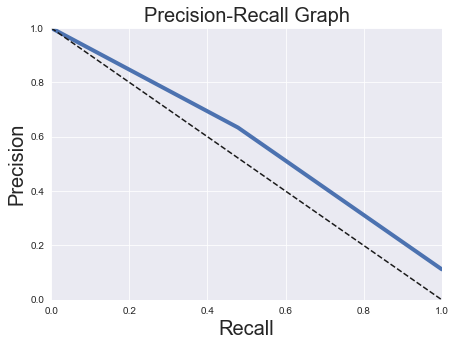

In [108]:
tree_y_pred = tree_best.predict(X_test_tr_pd)
print('Decision tree: ')
scoresResult(y_test, tree_y_pred)

precisions, recalls, thresholds = precision_recall_curve(y_test,tree_y_pred)
pre_vs_rec(precisions, recalls)



SVM: 
Scores Result: 
Training accuracy:  0.877
Precision =  0.4018058690744921
Recall =  0.19843924191750278
f1 score =  0.2656716417910448
  
              precision    recall  f1-score   support

       False       0.90      0.96      0.93      7103
        True       0.40      0.20      0.27       897

    accuracy                           0.88      8000
   macro avg       0.65      0.58      0.60      8000
weighted avg       0.85      0.88      0.86      8000

AUC = 0.5806


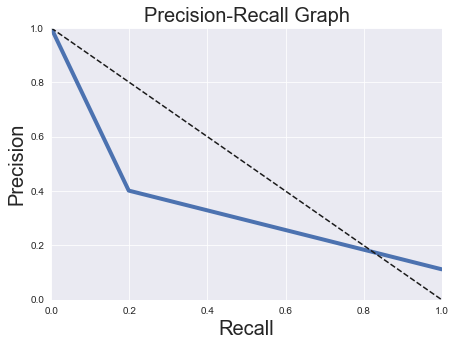

In [107]:
svm_y_pred = svm_best.predict(X_test_tr_pd)
print('\n\nSVM: ')
scoresResult(y_test, svm_y_pred)

precisions, recalls, thresholds = precision_recall_curve(y_test,svm_y_pred)
pre_vs_rec(precisions, recalls)



KNN: 
Scores Result: 
Training accuracy:  0.87375
Precision =  0.4567712318286152
Recall =  0.6655518394648829
f1 score =  0.5417422867513612
  
              precision    recall  f1-score   support

       False       0.96      0.90      0.93      7103
        True       0.46      0.67      0.54       897

    accuracy                           0.87      8000
   macro avg       0.71      0.78      0.73      8000
weighted avg       0.90      0.87      0.88      8000

AUC = 0.7828


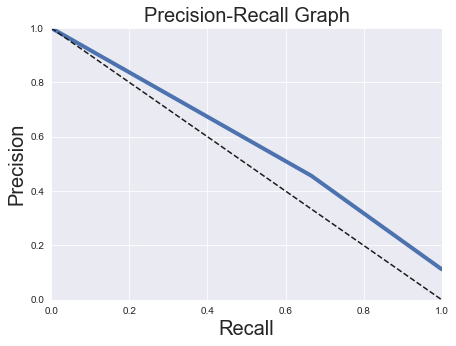

In [109]:
knn_y_pred = knn_best.predict(X_test_tr_pd)
print('\n\nKNN: ')
scoresResult(y_test, knn_y_pred)

precisions, recalls, thresholds = precision_recall_curve(y_test,knn_y_pred)
pre_vs_rec(precisions, recalls)

In [111]:
tree_fpr, tree_tpr, tree_thresholds = roc_curve(y_test,tree_y_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test,svm_y_pred)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test,knn_y_pred)

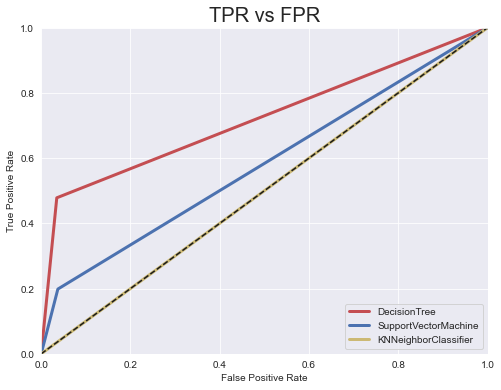

In [112]:
plt.figure(figsize = (8, 6))
plot_roc_curve(tree_fpr, tree_tpr, 'r-', 'DecisionTree')
plot_roc_curve(svm_fpr, svm_tpr, 'b-', 'SupportVectorMachine')
plot_roc_curve(knn_fpr, knn_fpr, 'y-', 'KNNeighborClassifier')
plt.legend (loc='lower right')
plt.show()